# **DESAFÍO Nº1: ESTADÍSTICAS DESCRIPTIVAS Y PROBABILIDADES (PARTE I)**
### **Módulo 4: Análisis Estadístico con Python**
#### *Carrera Data Science - G-78 - Desafio Latam*
#### Estudiante: Felipe Leal Arancibia

En este desafío validaremos nuestros conocimientos de estadística descriptiva aprendidos en la sesión. Para lograrlo, necesitarás aplicar lo aprendido, analizando un set de datos asociados a los ingresos obtenidos por la población en base de a la información demográfica entregada en el archivo ds_salaries.csv.

Lee todo el documento antes de comenzar el desarrollo individual, para asegurarte de tener el máximo de puntaje y enfocar bien los esfuerzos. 

Tiempo asociado: 1 hora cronológica

## Descripción

#### El conjunto de datos contiene un informe salarial fabricado en el que puedes realizar análisis para tratar de estimar el salario basado en las condiciones dadas.
(...)
Se busca realizar un análisis estadístico de estos salarios, considerando:

#### P1. El promedio general de los salarios, desviación estándar, quintiles y rango. (hint: escoge la columna adecuada para comparar)

In [36]:
# Se importan librerías para explorar bbdd en cvs
import pandas as pd
import numpy as np

In [37]:
# Se cargan los datos de archivo

salarios = pd.read_csv('ds_salaries.csv')
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [38]:
# Se exploran tipo de datos y cómo se presentan en concreto
salarios.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [18]:
# Se entrega una vista general del dataset, con sus medidas centrales 

salarios.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


##### **Respuesta P1:**

A partir de la tabla anterior ya se puede ver que se presentan los siguientes datos:
- Promedio de salarios (USD): 137570.38
- Desviación estándar salarios (USD): 63055.6

Ambos datos se comprobarán a continuación por separado, y se sumarán los quintiles y el rango.

In [19]:
# Media de salarios en dólares

salarios_promedio = round((salarios['salary_in_usd'].mean()),2)

f'La media de salario en dólares es de: {salarios_promedio}'

'La media de salario en dólares es de: 137570.39'

In [20]:
# Desviación Estándar 

desviacion_std_salarios = round(salarios['salary_in_usd'].std(),2)

f'La desviación estándar de los salarios (USD) es de: {desviacion_std_salarios}'

'La desviación estándar de los salarios (USD) es de: 63055.63'

In [21]:
# quintiles
# Una opción: q1 = salarios['salary_in_usd'].quantile(0.2) ... por cada uno
quintiles = np.quantile(salarios['salary_in_usd'], [1/5, 2/5, 3/5, 4/5, 1])
corte = 1

print('Cada corte de quintil de los salarios en UDS es: ')
# ciclo para simplificar la identificación de los cortes por cada quintil
for quintil in quintiles:
    print(f"Quintil {corte} = {quintil}")
    corte = corte+1

Cada corte de quintil de los salarios en UDS es: 
Quintil 1 = 83972.8
Quintil 2 = 120000.0
Quintil 3 = 149850.0
Quintil 4 = 185900.0
Quintil 5 = 450000.0


In [22]:
# Rango

salarios_rango = salarios['salary_in_usd'].max() - salarios['salary_in_usd'].min()

f'El rango de salarios (USD) es de: {salarios_rango}'

'El rango de salarios (USD) es de: 444868'

-
-
-
___0___o___
-
-
-

#### P2. Una comparación entre los salarios agrupados por 3 diferentes categorías a tu elección. ¿Para cuál de ellas las medidas de tendencia central son más representativas? ¿Para cuál son menos representativas? Explica.

In [23]:
# se importa librería para trabajar con gráficos e identificar mejor las medidas centrales
import matplotlib.pyplot as plt
import seaborn


In [24]:
# se chequean las categorías
salarios.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [25]:
# Se escogen tres categorías a comparar: 1) experience_level, 2) employment_type, 3) remote_ratio

In [53]:
# SE RENOMBRAN LAS CATEGORÍAS DE CADA COLUMNA SELECCIONADA 

# Renombrar: EN (nivel de entrada / junior), MI (nivel medio / intermedio), SE (nivel senior / experto), EX (nivel ejecutivo / director)

renombrar = {'EN': 'Entrada/Junior', 'MI': 'Medio/Intermedio', 'SE': 'Senior/Experto', 'EX': 'Ejecutivo/Director'}
salarios['experience_level'] = salarios['experience_level'].replace(renombrar)

#salarios['experience_level']


# renombrar los valores en 'remote_ratio'
# 0 (sin trabajo remoto, menos del 20%), 50 (parcialmente remoto), 100 (totalmente remoto, más del 80%)

renombre_ratios = {0: 'Presencial', 50: 'Híbrido', 100: 'Remoto'}
salarios['remote_ratio'] = salarios['remote_ratio'].replace(renombre_ratios)

#salarios['remote_ratio']


# renombrar typo de empleo
# PT (tiempo parcial), FT (tiempo completo), CT (contrato), FL (trabajo freelance)
renombre_tipo_empleo = {'PT':'Tiempo parcial', 'FT': 'Tiempo completo', 'CT': 'Contrato', 'FL': 'Trabajo freelance'}
salarios['employment_type'] = salarios['employment_type'].replace(renombre_tipo_empleo)
#salarios['employment_type']


In [40]:
# Para no repetir el código por cada columna, se decide crear una función para sacar medidas centrales por columna

def medidas_centrales_columna(columna):

    # Agrupar columna
    salario_x_columna = salarios.groupby(columna)['salary_in_usd']

    # se especifican las medidas de tendencia central a considerar.
    media_columna = round(salario_x_columna.mean(),2)
    mediana_columna = round(salario_x_columna.median(),2)
    moda_columna = salario_x_columna.apply(lambda x: x.mode().iloc[0])
    minimo_columna = salario_x_columna.min()
    maximo_columna = salario_x_columna.max()

    # Se pasan a un dataframe

    medidas_centrales_columna = pd.DataFrame({'Mínimo': minimo_columna, 'Máximo': maximo_columna, 'Media': media_columna, 'Mediana': mediana_columna, 'Moda': moda_columna})

    # ahora, se retorna la columna en forma de dataframe, con las medidas de tendencia central

    print(f'Estas son las medidas de tendencia central de salario por {columna}:')
    return medidas_centrales_columna



In [41]:
# También se crea una función para Graficar, en base a los dataset creados con la función anterior


def grafico_medidas_centrales_columna(df_columna):

    # Para poder interpretar de mejor forma los resultados, se pasa a graficar. 
    # El siguiente código -para hacer un gráfico- fue con apoyo de GPT

    seaborn.set(style='whitegrid')

    plt.figure(figsize=(10, 6))
    seaborn.barplot(x=df_columna.index, y='Media', data=df_columna, color='red', linestyle = '-.', label='Media')
    seaborn.barplot(x=df_columna.index, y='Mediana', data=df_columna, color='green',linestyle = '--',label='Mediana')

    # Líneas para el mínimo y máximo
    for i, nivel in enumerate(df_columna.index):
        plt.gca().hlines(y=df_columna['Mínimo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Mínimo' if i == 0 else '')
        plt.gca().hlines(y=df_columna['Máximo'][nivel], xmin=i - 0.2, xmax=i + 0.2, colors='red', linestyles='dashed', label='Máximo' if i == 0 else '')

    nombre_ejeX = input("Escriba el nombre del eje X (columna a visualizar que se cruza con Salario en USD)")

    plt.title(f'Medidas de Tendencia Central por {nombre_ejeX}')
    plt.xlabel(nombre_ejeX)
    plt.ylabel('Salario en USD')
    plt.legend()

    return plt.show()

In [54]:
# SE CREAR LOS DATAFRAMES POR CADA COLUMNA SELECCIONADA, CRUZADA POR SALARIO EN USD

In [50]:
mtc_experience_level = medidas_centrales_columna('experience_level')
mtc_experience_level

Estas son las medidas de tendencia central de salario por experience_level:


,Mínimo,Máximo,Media,Mediana,Moda
experience_level,,,,,
Ejecutivo/Director,15000,416000,194930.93,196000.0,200000
Entrada/Junior,5409,300000,78546.28,70000.0,100000
Medio/Intermedio,5132,450000,104525.94,100000.0,100000
Senior/Experto,8000,423834,153051.07,146000.0,120000


In [51]:
mtc_remote_ratio = medidas_centrales_columna('remote_ratio')

mtc_remote_ratio

Estas son las medidas de tendencia central de salario por remote_ratio:


,Mínimo,Máximo,Media,Mediana,Moda
remote_ratio,,,,,
Híbrido,5409,423000,78400.69,63312.0,50000
Presencial,5882,450000,144316.20,139600.0,120000
Remoto,5132,416000,136481.45,135000.0,150000


In [52]:
mtc_employment_type = medidas_centrales_columna('employment_type')

mtc_employment_type


Estas son las medidas de tendencia central de salario por employment_type:


,Mínimo,Máximo,Media,Mediana,Moda
employment_type,,,,,
Contrato,7500,416000,113446.90,75000.0,7500
Tiempo completo,5132,450000,138314.20,135000.0,150000
Tiempo parcial,5409,125404,39533.71,21669.0,12000
Trabajo freelance,12000,100000,51807.80,50000.0,50000


In [55]:
# AHORA, SE GRAFICAN LOS TRES POR SEPARADO, SUMANDO A CADA GRÁFICO UNA BREVE INTERPRETACIÓN

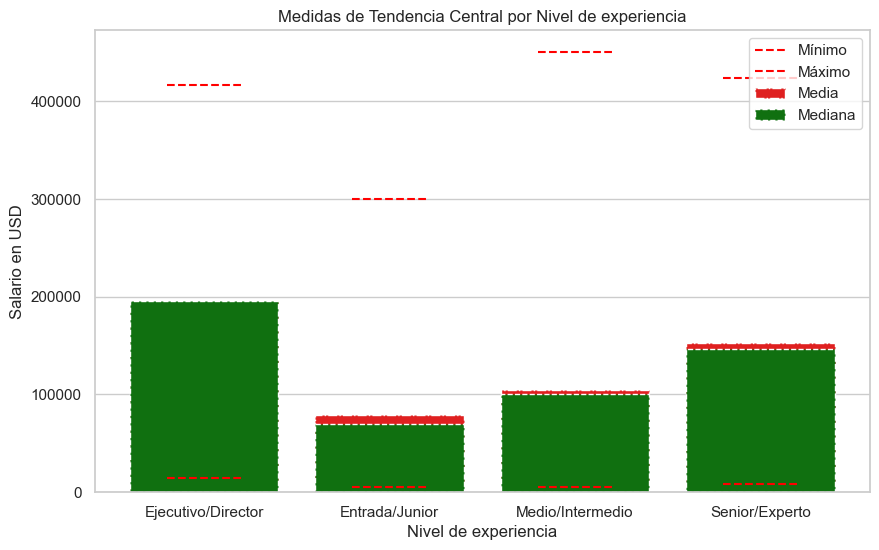

In [56]:
grafico_medidas_centrales_columna(mtc_experience_level)


#### Se puede ver que, de acuerdo al nivel de experiencia, las medidas de tendencia central del salario (en USD) están más alejadas del máximo de ingresos, siendo el más próximo a una mitad real el nivel de ingresos del grupo "Ejejutivo/Director", y el más cargado a ingresos mínimos los del grupo "Medio/Intermedio" y "Entrada/junior". 

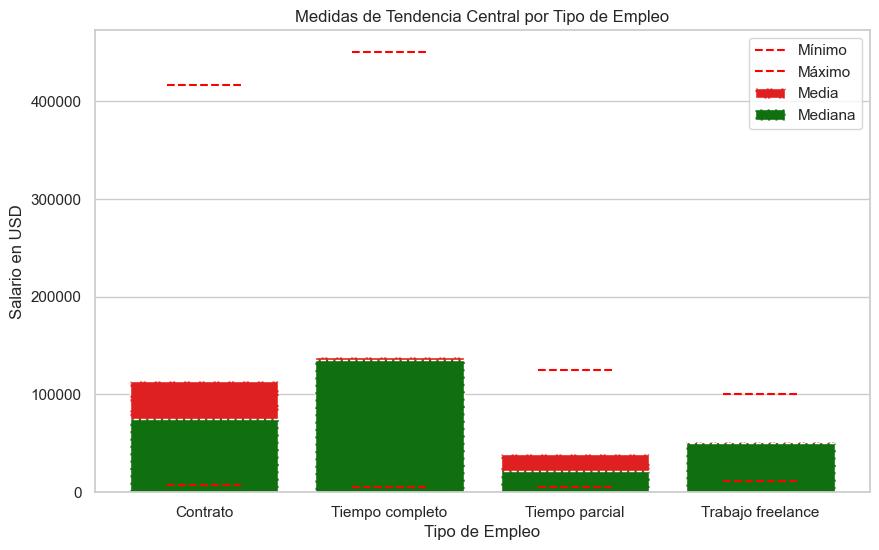

In [57]:
grafico_medidas_centrales_columna(mtc_employment_type)


#### Se puede apreciar que la categoría "Trabajo freelance" es el que más se acerca a un promedio representativo de los ingresos mínimos y máximos registrados. En el caso de "Contrato" se ve una diferencia notoria entre mediada y promedio, pero ambos, a la vez, están más cargada a los ingresos mínimos y muy alejados de los ingresos máximos. Esa lejanía también se aprecia en categoría "Tiempo completo"

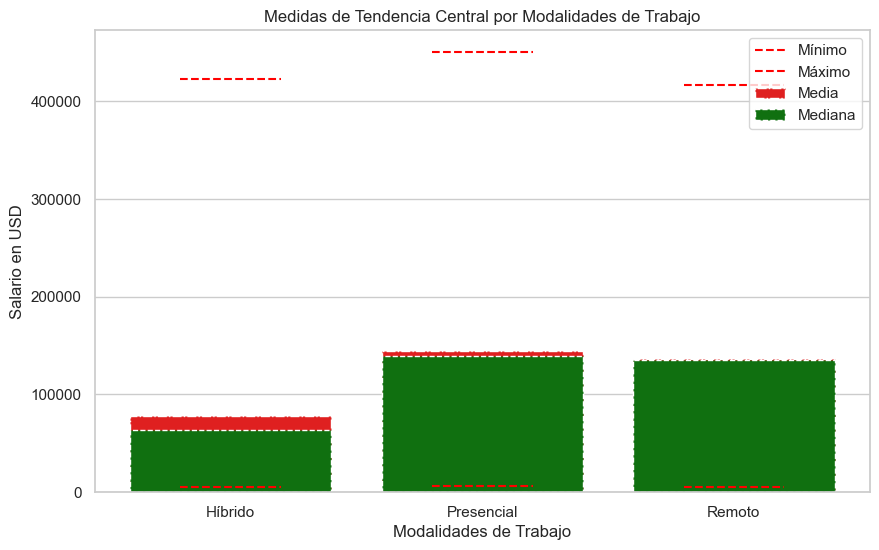

In [60]:
grafico_medidas_centrales_columna(mtc_remote_ratio)

#### En este últio caso, se aprecia que la tendencia central de todas las modalidades de trabajo están cargadas a los sueldos más bajos, demostrando que los sueldos más altos son valores atípicos dentro de cada una de sus categorías. 

In [95]:
# Por último, se unen los 3 DATAFRAMES creados, para luego compararlos en una gráfica


comparacion_columnas =  pd.concat([mtc_employment_type, mtc_experience_level, mtc_remote_ratio], ignore_index=False)

comparacion_columnas

,Mínimo,Máximo,Media,Mediana,Moda
Contrato,7500,416000,113446.90,75000.0,7500
Tiempo completo,5132,450000,138314.20,135000.0,150000
Tiempo parcial,5409,125404,39533.71,21669.0,12000
Trabajo freelance,12000,100000,51807.80,50000.0,50000
Ejecutivo/Director,15000,416000,194930.93,196000.0,200000
Entrada/Junior,5409,300000,78546.28,70000.0,100000
Medio/Intermedio,5132,450000,104525.94,100000.0,100000
Senior/Experto,8000,423834,153051.07,146000.0,120000
Híbrido,5409,423000,78400.69,63312.0,50000
Presencial,5882,450000,144316.20,139600.0,120000


In [96]:
# Rename para que se visualice bien en el gráfico

renombrar = {'Contrato': 'Contrato', 'Tiempo completo': 'T-Completo', 'Tiempo parcial': 'T-Parcial', 'Trabajo freelance': 'Freelance', 'Ejecutivo/Director': 'Director', 'Entrada/Junior': 'Junior', 'Medio/Intermedio': 'Intermedio', 'Senior/Experto': 'Senior', 'Híbrido':'Híbrido', 'Presencial':'Presencial', 'Remoto':'Remoto'}


comparacion_columnas.rename(index=renombrar, inplace=True)

comparacion_columnas


,Mínimo,Máximo,Media,Mediana,Moda
Contrato,7500,416000,113446.90,75000.0,7500
T-Completo,5132,450000,138314.20,135000.0,150000
T-Parcial,5409,125404,39533.71,21669.0,12000
Freelance,12000,100000,51807.80,50000.0,50000
Director,15000,416000,194930.93,196000.0,200000
Junior,5409,300000,78546.28,70000.0,100000
Intermedio,5132,450000,104525.94,100000.0,100000
Senior,8000,423834,153051.07,146000.0,120000
Híbrido,5409,423000,78400.69,63312.0,50000
Presencial,5882,450000,144316.20,139600.0,120000


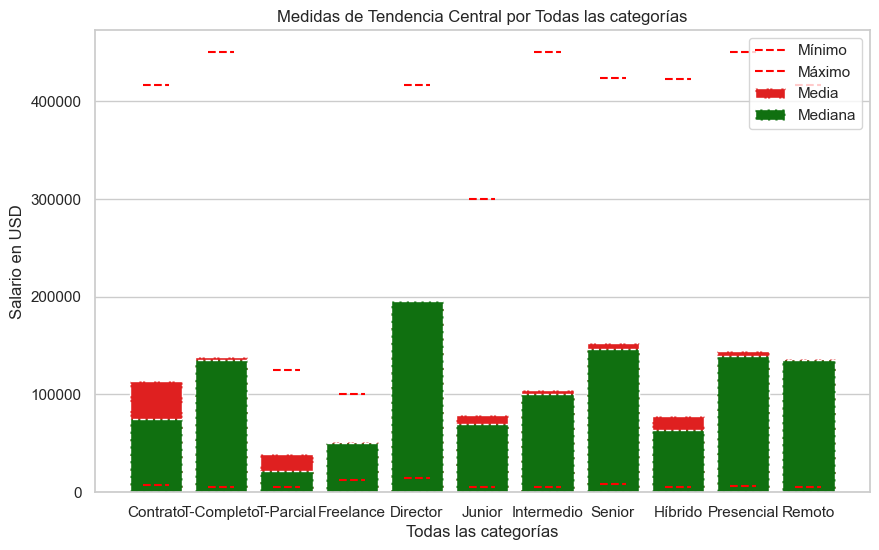

In [97]:
grafico_medidas_centrales_columna(comparacion_columnas)

#### Por último, si se visualizas todas las categorías en una sola gráfica, se puede ver que las medidas de tendencia central que son más representativas de las medidas mínimas y máximas son las de la columna "Ejecutivo/Director" y la de "Freelance". Todas las demás están cargadas a sueldos más bajos.

#### Lo dicho anteriormente se comprueba si se revisa el siguiente gráfico -un BOXPLOT-, en donde las cajas y sus bigotes son acotados, y se mantienen en cierta posición simétrica entre los outliers mínimos y máximos representados por círculos.  Los ouliers máximos, para casi todas las otras categorías, están muy distantes.

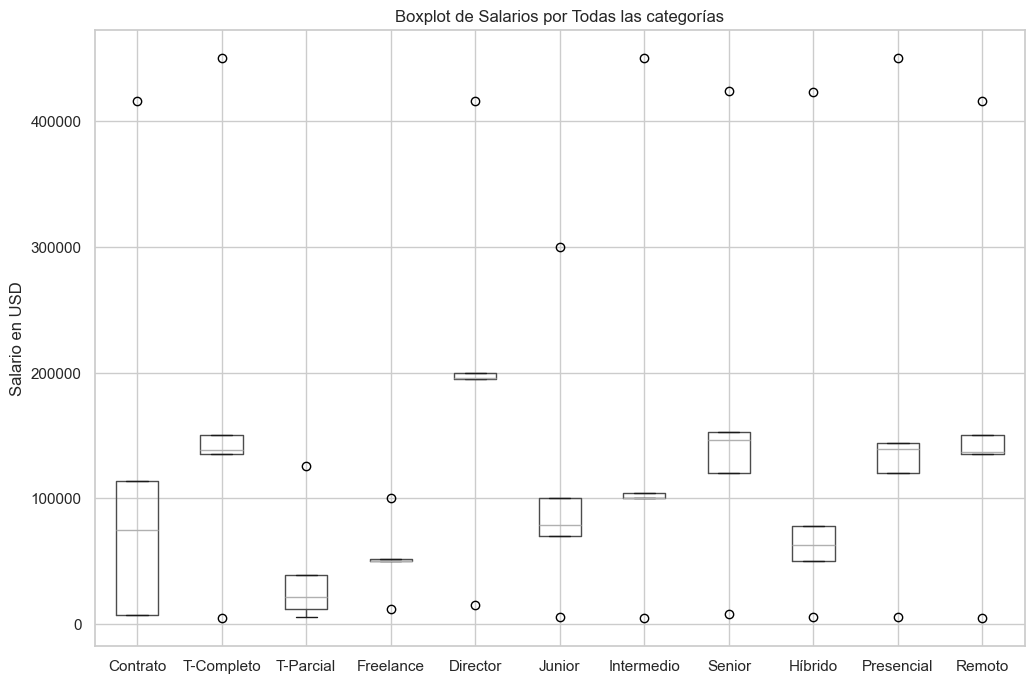

In [132]:
comparacion_columnas2 = comparacion_columnas.T 

plt.figure(figsize=(12, 8))
comparacion_columnas2.boxplot()
plt.title('Boxplot de Salarios por Todas las categorías')
plt.ylabel('Salario en USD')
plt.show()

-
-
-
___0___o___
-
-
-

#### **P3. ¿Qué cargos reciben mejores sueldos en las empresas con sede en Estados Unidos?**

In [108]:
empresas_usa = salarios[salarios['company_location'] == 'US']

empresas_usa.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,Medio/Intermedio,Contrato,ML Engineer,30000,USD,30000,US,Remoto,US,S
2,2023,Medio/Intermedio,Contrato,ML Engineer,25500,USD,25500,US,Remoto,US,S
5,2023,Senior/Experto,Tiempo completo,Applied Scientist,222200,USD,222200,US,Presencial,US,L


In [124]:
sueldos_x_cargo = empresas_usa.groupby('job_title')['salary_in_usd'].agg(['min', 'max', 'mean', 'count']).sort_values(by='count', ascending=False)

sueldos_x_cargos_cantidad = round(sueldos_x_cargo.head(5),2)

sueldos_x_cargos_cantidad.sort_values(by='mean', ascending=False)

,min,max,mean,count
job_title,,,,
Machine Learning Engineer,81000,342300,174385.13,219
Data Architect,63000,376080,163092.69,97
Data Scientist,5679,412000,158283.88,674
Data Engineer,20000,324000,152798.02,907
Data Analyst,20000,385000,116656.98,525


##### Si se filtra por los 5 puestos con más participantes en la muestra, se pueden ver los cargos de Machine Learning Engineer (USD 174,385 promedio), Data Architect (USD 163,092 promedio) y Data Scientist (USD 158,283 promedio) como los que reciben los mejores sueldos en Estados Unidos.

In [130]:
sueldos_x_cargo_monto = empresas_usa.groupby('job_title')['salary_in_usd'].agg(['min', 'max', 'mean', 'count']).sort_values(by='mean', ascending=False)

sueldos_x_cargo_monto = round(sueldos_x_cargo_monto.head(5),2)
sueldos_x_cargo_monto


,min,max,mean,count
job_title,,,,
Data Analytics Lead,405000,405000,405000.0,1
Data Science Tech Lead,375000,375000,375000.0,1
Director of Data Science,249300,353200,294375.0,4
Principal Data Scientist,151000,416000,255500.0,4
Cloud Data Architect,250000,250000,250000.0,1


##### En tanto, si se filtran y ordenan por promedio de salario (sin importar la cantidad de participantes en cada uno de esos cargos), podemos encontrar dentro de los 3 primeros lugares a Data Analytics Lead (USD 405,000 promedio), Data Science Tech Lead (USD 375,000 promedio) y Director of Data Science (USD 294,375). 




##### Para finalizar, se puede observar que, frente a un mismo dataset, se pueden interpretar dos cosas totalmente distintas, sólo por considerar o no ciertos valores. 

-
-
-
___0_FiN__o___
-
-
-

### Requerimientos
Dentro del archivo de Jupyter Notebook debes ir ejecutando las siguientes acciones y explicar lo que estás haciendo. Debes considerar los siguientes aspectos.

1. Calcular los indicadores estadísticos solicitados, sobre columnas específicas. (3 Puntos)

2. Calcular indicadores estadísticos, agrupando y filtrando los 
valores (3 Puntos)

3. Interpretar los indicadores estadísticos en cada caso, considerando medidas de tendencia central y dispersión.(4 Puntos)